In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("phising.csv")
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
data.shape

(10887, 31)

C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Result', ylabel='Density'>

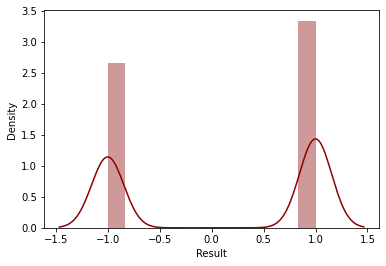

In [4]:
sns.distplot(data['Result'], color='darkred')

In [5]:
a=len(data[data.Result==-1])
b=len(data[data.Result==1])
print("Count of Phishy Websites = ", b)
print("Count of Suspicious Websites = ", a)

Count of Phishy Websites =  6057
Count of Suspicious Websites =  4830


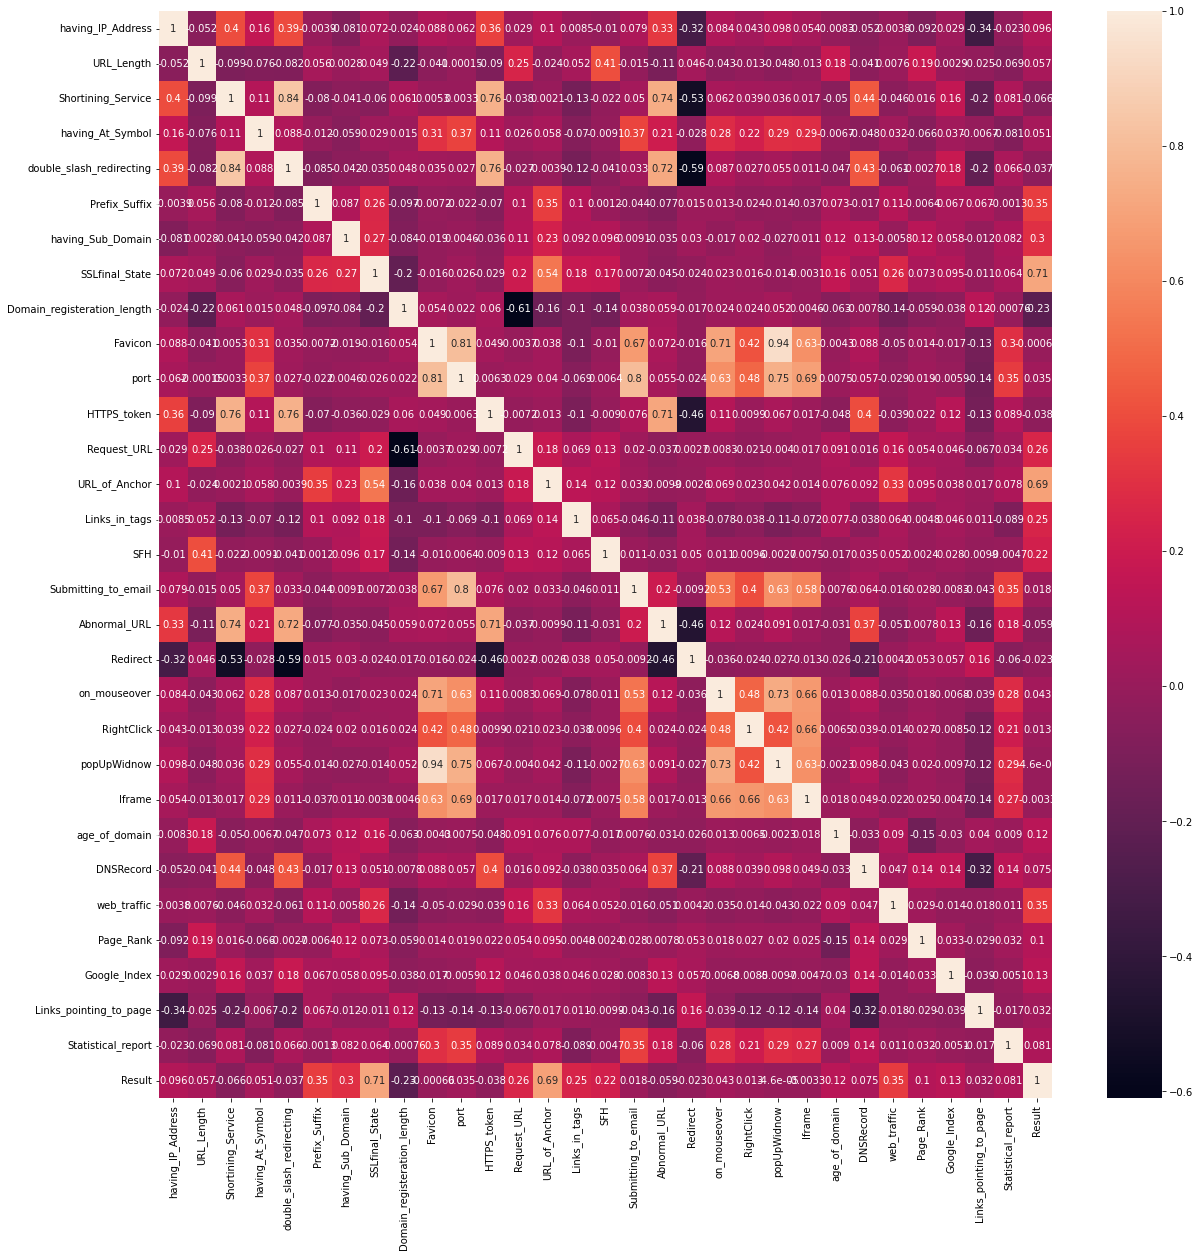

In [6]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True)

In [7]:
from sklearn.model_selection import train_test_split,cross_val_score

In [8]:
X= data.drop(columns='Result')
X.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [9]:
Y=data['Result']
Y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int64

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.40,random_state=10)

In [11]:
print(X_train.shape)
print(X_test.shape)

(6532, 30)
(4355, 30)


In [12]:
print(Y_train.shape)
print(Y_test.shape)

(6532,)
(4355,)


[0.0133901  0.00888216 0.00613872 0.00575566 0.00505157 0.04788564
 0.05172948 0.30851785 0.01614407 0.00442791 0.00294198 0.00684994
 0.02649919 0.24744523 0.04293275 0.02460189 0.00562789 0.00563978
 0.00616823 0.00373003 0.00217788 0.00613441 0.00320423 0.01796747
 0.01231405 0.0658948  0.01404972 0.01310081 0.01881756 0.00597899]
------------------------------------------------------------------------------
The accurcy of Extra Trees Classifier Model is :  96.76234213547646
              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1987
           1       0.97      0.97      0.97      2368

    accuracy                           0.97      4355
   macro avg       0.97      0.97      0.97      4355
weighted avg       0.97      0.97      0.97      4355



<AxesSubplot:>

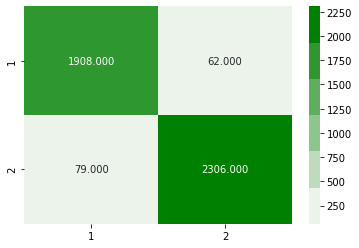

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.ensemble import ExtraTreesClassifier
model_1 = ExtraTreesClassifier()
M1=model_1.fit(X_train,Y_train)
print(model_1.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
extra_trees_predict= model_1.predict(X_test)
print('------------------------------------------------------------------------------')
print('The accurcy of Extra Trees Classifier Model is : ', 100.0 * accuracy_score(extra_trees_predict,Y_test))
print(classification_report(extra_trees_predict,Y_test))
Z=confusion_matrix(Y_test, extra_trees_predict)
sns.heatmap(Z, annot=True, cmap=sns.light_palette("green"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])

In [14]:
feat_importances = pd.Series(model_1.feature_importances_, index=X.columns)

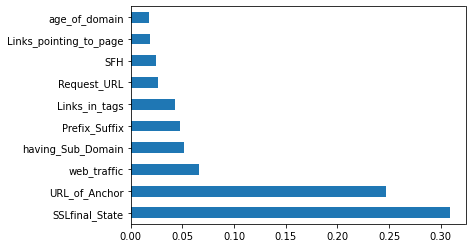

In [15]:
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


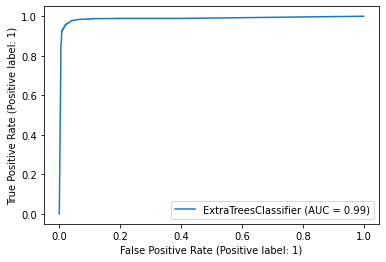

In [16]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(M1,X_test,Y_test)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()
M2=model_2.fit(X_train,Y_train)
dtree_predict=model_2.predict(X_test)
print('The accuracy of Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,Y_test))

The accuracy of Decision Tree Classifier is:  95.66016073478761


In [18]:
print(classification_report(dtree_predict,Y_test))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95      2013
           1       0.95      0.97      0.96      2342

    accuracy                           0.96      4355
   macro avg       0.96      0.96      0.96      4355
weighted avg       0.96      0.96      0.96      4355



In [19]:
A=confusion_matrix(Y_test, dtree_predict)

<AxesSubplot:>

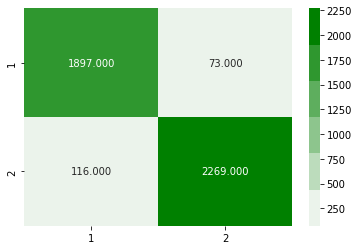

In [20]:
sns.heatmap(A, annot=True, cmap=sns.light_palette("green"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])

C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


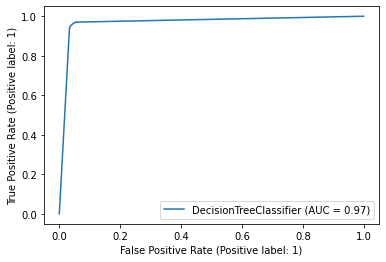

In [21]:
plot_roc_curve(M2,X_test,Y_test)

In [22]:
from sklearn.linear_model import LogisticRegression
model_3=LogisticRegression()
M3=model_3.fit(X_train, Y_train)
logreg_predict= model_3.predict(X_test)
print('The accurcy of Logistic Regression Model is : ', 100.0 * accuracy_score(logreg_predict,Y_test))


The accurcy of Logistic Regression Model is :  92.3076923076923


In [23]:
print(classification_report(logreg_predict,Y_test))

              precision    recall  f1-score   support

          -1       0.90      0.92      0.91      1929
           1       0.94      0.92      0.93      2426

    accuracy                           0.92      4355
   macro avg       0.92      0.92      0.92      4355
weighted avg       0.92      0.92      0.92      4355



<AxesSubplot:>

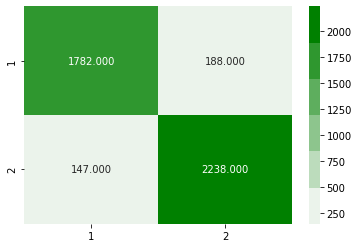

In [24]:
B=confusion_matrix(Y_test, logreg_predict)
sns.heatmap(B, annot=True, cmap=sns.light_palette("green"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])

C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


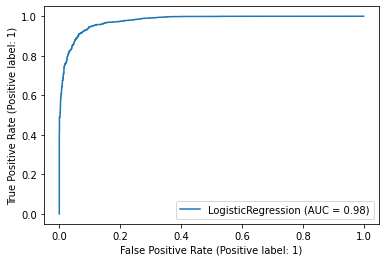

In [25]:
plot_roc_curve(M3,X_test,Y_test)

The accuracy of Random Forest Classifier is:  96.83122847301952
              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1972
           1       0.97      0.97      0.97      2383

    accuracy                           0.97      4355
   macro avg       0.97      0.97      0.97      4355
weighted avg       0.97      0.97      0.97      4355



C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


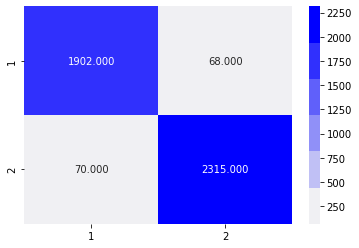

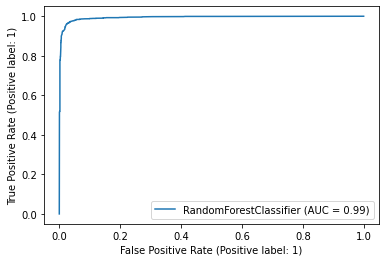

In [26]:
from sklearn.ensemble import RandomForestClassifier
model_4=RandomForestClassifier()
M4=model_4.fit(X_train,Y_train)
rfc_predict=model_4.predict(X_test)
print('The accuracy of Random Forest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,Y_test))
print(classification_report(rfc_predict,Y_test))
C=confusion_matrix(Y_test, rfc_predict)
sns.heatmap(C, annot=True, cmap=sns.light_palette("blue"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])
plot_roc_curve(M4,X_test,Y_test)

The accuracy of SVM Classifier is:  94.12169919632606
              precision    recall  f1-score   support

          -1       0.92      0.95      0.93      1894
           1       0.96      0.93      0.95      2461

    accuracy                           0.94      4355
   macro avg       0.94      0.94      0.94      4355
weighted avg       0.94      0.94      0.94      4355



C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


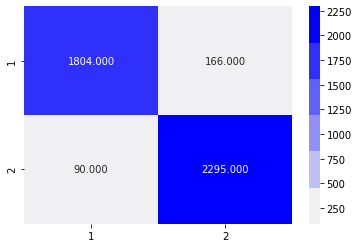

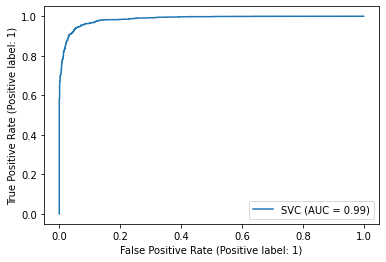

In [27]:
from sklearn.svm import SVC
model_5=SVC()
M5=model_5.fit(X_train,Y_train)
svm_predict=model_5.predict(X_test)
print('The accuracy of SVM Classifier is: ', 100.0 * accuracy_score(svm_predict,Y_test))
print(classification_report(svm_predict,Y_test))
D=confusion_matrix(Y_test, svm_predict)
sns.heatmap(D, annot=True, cmap=sns.light_palette("blue"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])
plot_roc_curve(M5,X_test,Y_test)

The accuracy of Ada Boost Classifier is:  91.1366245694604
              precision    recall  f1-score   support

          -1       0.90      0.91      0.90      1954
           1       0.92      0.92      0.92      2401

    accuracy                           0.91      4355
   macro avg       0.91      0.91      0.91      4355
weighted avg       0.91      0.91      0.91      4355



C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


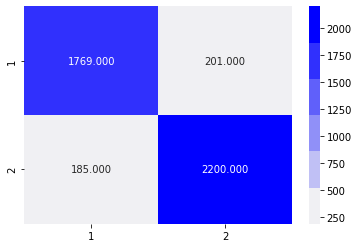

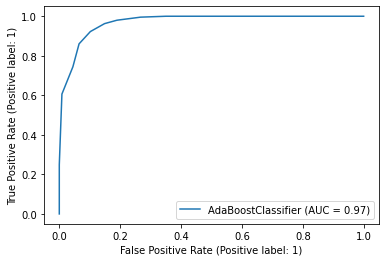

In [28]:
from sklearn.ensemble import AdaBoostClassifier
model_6=AdaBoostClassifier(n_estimators=5,learning_rate=1)
M6=model_6.fit(X_train,Y_train)
adc_predict=model_6.predict(X_test)
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(adc_predict,Y_test))
print(classification_report(adc_predict,Y_test))
E=confusion_matrix(Y_test, adc_predict)
sns.heatmap(E, annot=True, cmap=sns.light_palette("blue"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])
plot_roc_curve(M6,X_test,Y_test)

C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of XGBoost Classifier is:  96.83122847301952
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1970
           1       0.97      0.97      0.97      2385

    accuracy                           0.97      4355
   macro avg       0.97      0.97      0.97      4355
weighted avg       0.97      0.97      0.97      4355



C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


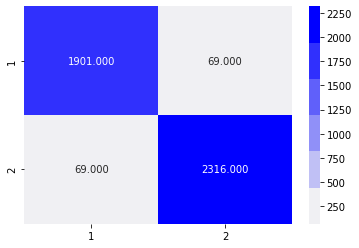

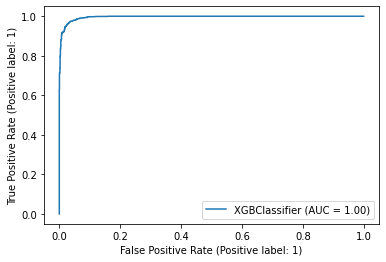

In [29]:
from xgboost import XGBClassifier
model_7=XGBClassifier()
M7=model_7.fit(X_train,Y_train)
xgb_predict=model_7.predict(X_test)
print('The accuracy of XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,Y_test))
print(classification_report(xgb_predict,Y_test))
F=confusion_matrix(Y_test, xgb_predict)
sns.heatmap(F, annot=True, cmap=sns.light_palette("blue"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])
plot_roc_curve(M7,X_test,Y_test)

In [30]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  M8=knn.fit(X_train, Y_train.values.ravel())
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != Y_test.values.ravel()))

Text(0, 0.5, 'Error Rate')

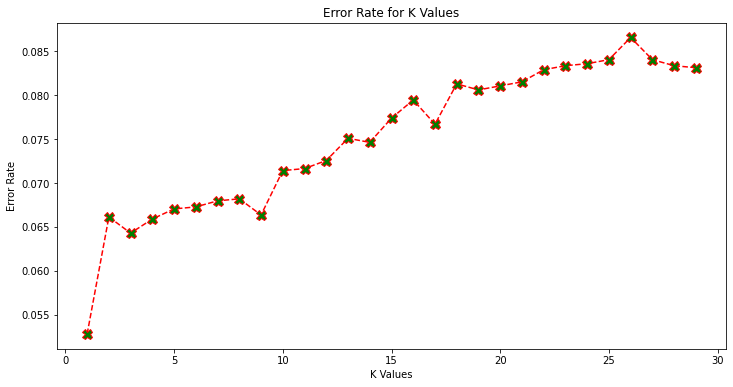

In [31]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed', marker='X', markerfacecolor='green', markersize=10)
plt.title('Error Rate for K Values')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

The accuracy of KNN Model is:  94.7187141216992
              precision    recall  f1-score   support

          -1       0.95      0.93      0.94      1970
           1       0.94      0.96      0.95      2385

    accuracy                           0.95      4355
   macro avg       0.95      0.95      0.95      4355
weighted avg       0.95      0.95      0.95      4355



C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


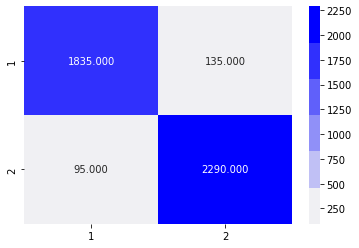

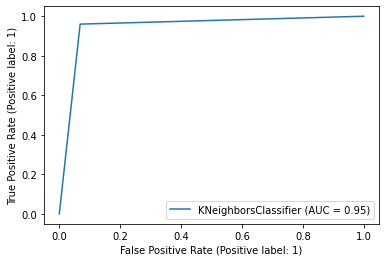

In [32]:
knn1=KNeighborsClassifier(n_neighbors=1)
M9=knn1.fit(X_train,Y_train)
knn_predict=M9.predict(X_test)
print('The accuracy of KNN Model is: ', 100.0 * accuracy_score(knn_predict,Y_test))
print(classification_report(Y_test,knn_predict))
G=confusion_matrix(Y_test, knn_predict)
sns.heatmap(G, annot=True, cmap=sns.light_palette("blue"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])
plot_roc_curve(M9,X_test,Y_test)

In [33]:
print('Extra Trees Classifier Model is : ', 100.0 * accuracy_score(extra_trees_predict,Y_test))
print('Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,Y_test))
print('Logistic Regression Model is : ', 100.0 * accuracy_score(logreg_predict,Y_test))
print('Random Forest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,Y_test))
print('SVM Classifier is: ', 100.0 * accuracy_score(svm_predict,Y_test))
print('Ada Boost Classifier is: ', 100.0 * accuracy_score(adc_predict,Y_test))
print('XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,Y_test))
print('KNN Model is: ', 100.0 * accuracy_score(knn_predict,Y_test))

Extra Trees Classifier Model is :  96.76234213547646
Decision Tree Classifier is:  95.66016073478761
Logistic Regression Model is :  92.3076923076923
Random Forest Classifier is:  96.83122847301952
SVM Classifier is:  94.12169919632606
Ada Boost Classifier is:  91.1366245694604
XGBoost Classifier is:  96.83122847301952
KNN Model is:  94.7187141216992


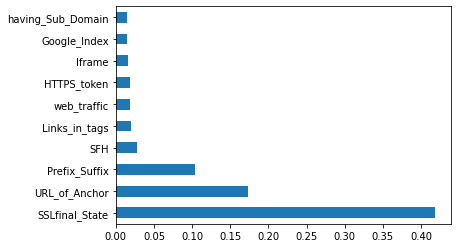

In [34]:
feat_importances = pd.Series(model_7.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

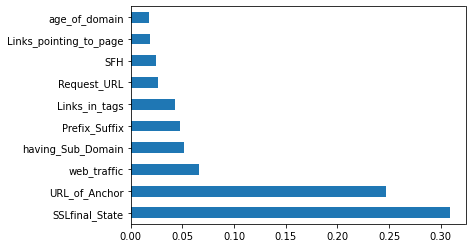

In [35]:
feat_importances = pd.Series(model_1.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# <h1>ROC CURVE COMBINED<h1>

[0.         0.03975843 1.        ] [0.         0.97381757 1.        ] [ 2  1 -1]
[0.         0.05762543 1.        ] [0.         0.96883006 1.        ] [ 2  1 -1]
[0.         0.07620529 1.        ] [0.         0.92250618 1.        ] [ 2  1 -1]
[0.         0.03549696 1.        ] [0.         0.97146454 1.        ] [ 2  1 -1]
[0.         0.04751848 1.        ] [0.         0.93254774 1.        ] [ 2  1 -1]
[0.         0.09467758 1.        ] [0.         0.91628488 1.        ] [ 2  1 -1]
[0.         0.03502538 1.        ] [0.         0.97106918 1.        ] [ 2  1 -1]
[0.        0.0492228 1.       ] [0.        0.9443299 1.       ] [ 2  1 -1]
[0. 1.] [0. 1.]


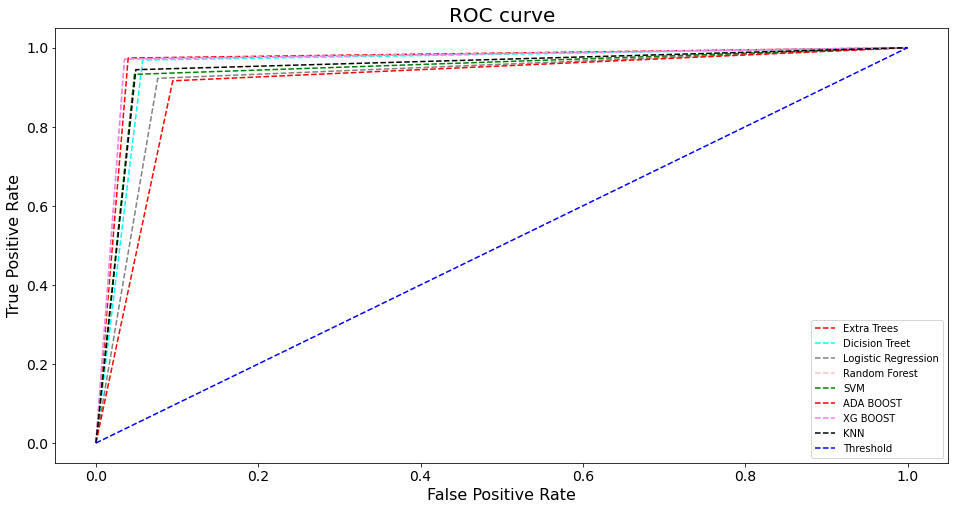

In [36]:
fpr1, tpr1, thresholds = roc_curve(extra_trees_predict,Y_test, pos_label=1)
print(fpr1,tpr1,thresholds)

fpr2, tpr2, thresholds = roc_curve(dtree_predict,Y_test, pos_label=1)
print(fpr2,tpr2,thresholds)

fpr3, tpr3, thresholds = roc_curve(logreg_predict,Y_test, pos_label=1)
print(fpr3,tpr3,thresholds)

fpr4, tpr4, thresholds = roc_curve(rfc_predict,Y_test, pos_label=1)
print(fpr4,tpr4,thresholds)

fpr5, tpr5, thresholds = roc_curve(svm_predict,Y_test, pos_label=1)
print(fpr5,tpr5,thresholds)

fpr6, tpr6, thresholds = roc_curve(adc_predict,Y_test, pos_label=1)
print(fpr6,tpr6,thresholds)

fpr7, tpr7, thresholds = roc_curve(xgb_predict,Y_test, pos_label=1)
print(fpr7,tpr7,thresholds)

fpr8, tpr8, thresholds = roc_curve(knn_predict,Y_test, pos_label=1)
print(fpr8,tpr8,thresholds)



random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
print(p_fpr,p_tpr)


plt.figure(figsize=(16,8))
plt.plot(fpr1, tpr1, linestyle='--',color='red',label= 'Extra Trees')
plt.plot(fpr2, tpr2, linestyle='--',color='CYAN',label= 'Dicision Treet')
plt.plot(fpr3, tpr3, linestyle='--',color='GREY',label= 'Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='--',color='PINK',label= 'Random Forest')
plt.plot(fpr5, tpr5, linestyle='--',color='green',label= 'SVM')
plt.plot(fpr6, tpr6, linestyle='--',color='RED',label= 'ADA BOOST')
plt.plot(fpr7, tpr7, linestyle='--',color='Violet',label= 'XG BOOST')
plt.plot(fpr8, tpr8, linestyle='--',color='Black',label= 'KNN')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Threshold')


plt.title("ROC curve",fontsize=20)
plt.ylabel('True Positive Rate',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=16)
plt.legend(loc='best', prop={"size":10})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
x_train_smote,y_train_smote = smote.fit_resample(X_train, Y_train)

print('Original dataset shape', Counter(Y_train))
print('Resample dataset shape', Counter(y_train_smote))

Original dataset shape Counter({1: 3672, -1: 2860})
Resample dataset shape Counter({-1: 3672, 1: 3672})


C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


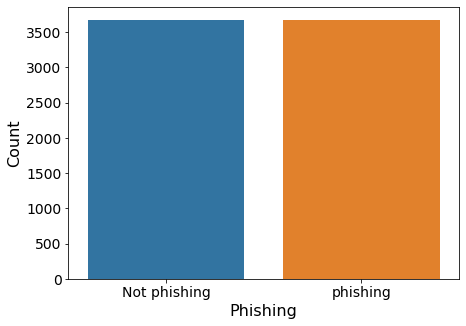

In [38]:
fig_dims = (7,5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.countplot(y_train_smote,ax=ax)
g.set_xticklabels(['Not phishing','phishing'], fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Phishing',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

The accuracy of Ada Boost Classifier is:  91.1366245694604
              precision    recall  f1-score   support

          -1       0.90      0.91      0.90      1954
           1       0.92      0.92      0.92      2401

    accuracy                           0.91      4355
   macro avg       0.91      0.91      0.91      4355
weighted avg       0.91      0.91      0.91      4355



C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


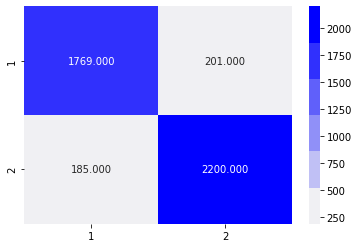

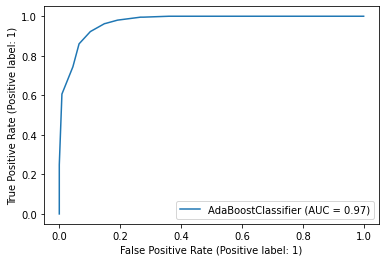

In [39]:
model_6_smote=AdaBoostClassifier(n_estimators=5,learning_rate=1)
M6_smote=model_6_smote.fit(x_train_smote,y_train_smote)
adc_predict=model_6_smote.predict(X_test)
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(adc_predict,Y_test))
print(classification_report(adc_predict,Y_test))
F=confusion_matrix(Y_test, adc_predict)
sns.heatmap(F, annot=True, cmap=sns.light_palette("blue"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])
plot_roc_curve(model_6_smote,X_test,Y_test)

In [40]:
#After Scalling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train_smote)
scaled_x_test = scaler.transform(X_test)

The accuracy of Ada Boost Classifier is:  91.1366245694604
              precision    recall  f1-score   support

          -1       0.90      0.91      0.90      1954
           1       0.92      0.92      0.92      2401

    accuracy                           0.91      4355
   macro avg       0.91      0.91      0.91      4355
weighted avg       0.91      0.91      0.91      4355



C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\comp444\.conda\envs\Malware2\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


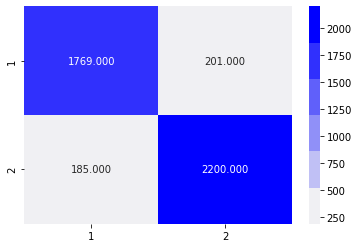

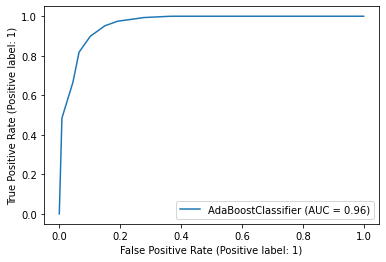

In [42]:
model_6_smote=AdaBoostClassifier(n_estimators=5,learning_rate=1)
M6_smote=model_6_smote.fit(scaled_x_train,y_train_smote)
adc_predict=model_6_smote.predict(scaled_x_test)
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(adc_predict,Y_test))
print(classification_report(adc_predict,Y_test))
F=confusion_matrix(Y_test, adc_predict)
sns.heatmap(F, annot=True, cmap=sns.light_palette("blue"), fmt=".3f", xticklabels=[1,2], yticklabels=[1,2])
plot_roc_curve(model_6_smote,X_test,Y_test)

Text(0.5, 1.0, 'ROC_KNN_Class')

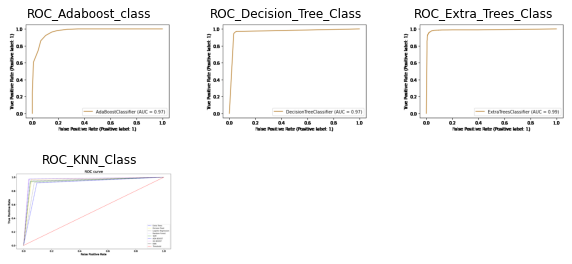

In [53]:
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 3
columns = 3
  
# reading images
Image1 = cv2.imread('Adaboost.PNG')
Image2 = cv2.imread('Dtree.PNG')
Image3 = cv2.imread('Etree.PNG')
Image4 = cv2.imread('KNN.PNG')
Image5 = cv2.imread('LogReg.PNG')
Image6 = cv2.imread('RFC.PNG')
Image7 = cv2.imread('SVM.PNG')
Image8 = cv2.imread('XGboost.PNG')
Image9 = cv2.imread('All.PNG')

  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("ROC_Adaboost_class")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("ROC_Decision_Tree_Class")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("ROC_Extra_Trees_Class")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image9)
plt.axis('off')
plt.title("ROC_KNN_Class")


